In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Create a datfaframe to hold facets sensor location data
sensor_location_data = {'Sensor ID': [], 'Sensor Description': [], 'Status': [], 'Location Type': [], 'Longitude': [], 'Latitude': []}
sensor_location_df = pd.DataFrame(sensor_location_data)

In [22]:
# Set the API base URL
url = 'https://data.melbourne.vic.gov.au/api/'

# Define the endpoint and query parameters
endpoint = '/records/1.0/search/'
params = {
    'dataset': 'pedestrian-counting-system-sensor-locations',
    'q': '',
    'facet': 'location_id'
}

# Send the API request to get the list of distinct Sensor IDs
response = requests.get(url + endpoint, params=params)
data = response.json()
sensor_ids = [f['name'] for f in data['facet_groups'][0]['facets']]

# Create an empty list to store the results
results = []

# Loop through the Sensor IDs to retrieve the data for each sensor
for sensor_id in sensor_ids:
    params['q'] = f'location_id:"{sensor_id}"'
    response = requests.get(url + endpoint, params=params)
    data = response.json()
    records = data['records']

    for record in records:
        sensor_location_data = {
            'Sensor ID': record['fields']['location_id'],
            'Sensor Description': record['fields']['sensor_description'],
            'Status': record['fields']['status'],
            'Location Type': record['fields']['location_type'],
            'Longitude': record['fields']['longitude'],
            'Latitude': record['fields']['latitude']
        }
        results.append(sensor_location_data)

# Convert the results to a DataFrame
sensor_location_df = pd.DataFrame(results)

# Print summary
print("Data Retrieval Complete")
print(f"Number of Records: {len(sensor_location_df)}")

filename = '../Datasets/sensor_locations.csv'
sensor_location_df.to_csv(filename, index=False)

# Display the dataframe
sensor_location_df


Data Retrieval Complete
Number of Records: 100


,Sensor ID,Sensor Description,Status,Location Type,Longitude,Latitude
0,1,Bourke Street Mall (North),A,Outdoor,144.965153,-37.813494
1,2,Bourke Street Mall (South),A,Outdoor,144.965167,-37.813807
2,3,Melbourne Central,A,Outdoor,144.964295,-37.811015
3,4,Town Hall (West),A,Outdoor,144.966088,-37.814880
4,5,Princes Bridge,A,Outdoor,144.967877,-37.818742
...,...,...,...,...,...,...
95,110,Birrarung Marr East Entry,A,Outdoor Blix,144.975902,-37.821029
96,111,Harbour Esplanade,A,Outdoor Blix,144.944366,-37.814426
97,112,Argyle Sq Park,A,Outdoor Blix,144.965642,-37.802553
98,113,Micro-labs Blix,A,Indoor Blix,144.966893,-37.813345


In [23]:
# Pedestrian sensor data file
pedestrian_sensor_counts_path = "../Datasets/Pedestrian_Counting_System_Monthly_counts_per_hour_may_2009_to_14_dec_2022.csv"

# Read the pedestrian sensor data file
pedestrian_sensor_counts = pd.read_csv(pedestrian_sensor_counts_path)


pedestrian_sensor_counts_df = pd.DataFrame(pedestrian_sensor_counts)
pedestrian_sensor_counts_df

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...,...
4562225,4567697,"October 31, 2022 07:00:00 PM",2022,October,31,Monday,19,87,Errol St (West),185
4562226,4567698,"October 31, 2022 08:00:00 PM",2022,October,31,Monday,20,87,Errol St (West),108
4562227,4567699,"October 31, 2022 09:00:00 PM",2022,October,31,Monday,21,87,Errol St (West),58
4562228,4567700,"October 31, 2022 10:00:00 PM",2022,October,31,Monday,22,87,Errol St (West),18


In [24]:
# group the rows by Sensor_ID, Year, Month, and Mdate columns
grouped_df = pedestrian_sensor_counts_df.groupby(['Sensor_ID', 'Year', 'Month', 'Mdate'])

# aggregate the data using the sum function
summed_df = grouped_df.sum(numeric_only=True)

# reset the index to make the columns Sensor_ID, Year, Month, and Mdate regular columns
summed_df = summed_df.reset_index()

# filter the rows based on the given conditions
filtered_df = summed_df[(summed_df['Mdate'] == 1) & (summed_df['Year'].isin([2018, 2020, 2022]))]

# reset the index
filtered_df = filtered_df.reset_index(drop=True)

filtered_df = filtered_df.drop(['Time', 'ID'], axis=1)

filtered_df = filtered_df.rename(columns={'Hourly_Counts': 'Daily Count'})
filtered_df = filtered_df.rename(columns={'Sensor_ID': 'Sensor ID'})

num_unique_sensors = filtered_df['Sensor ID'].nunique()
print(f"Number of unique sensors: {num_unique_sensors}")

filtered_df

Number of unique sensors: 77


,Sensor ID,Year,Month,Mdate,Daily Count
0,1,2018,April,1,32566
1,1,2018,August,1,31572
2,1,2018,December,1,43833
3,1,2018,February,1,32029
4,1,2018,January,1,28085
...,...,...,...,...,...
1952,86,2022,September,1,1517
1953,87,2022,August,1,2327
1954,87,2022,July,1,2918
1955,87,2022,October,1,3314


In [25]:
mean_df = filtered_df.groupby(['Sensor ID', 'Year']).agg({'Daily Count': 'mean'}).reset_index()
mean_df = mean_df.rename(columns={'Daily Count': 'Mean Daily Count'})

mean_df

,Sensor ID,Year,Mean Daily Count
0,1,2018,33300.000000
1,1,2020,12806.750000
2,1,2022,16719.300000
3,2,2018,23232.166667
4,2,2020,8165.166667
...,...,...,...
188,79,2022,10673.200000
189,84,2022,20860.300000
190,85,2022,1769.500000
191,86,2022,1275.000000


In [26]:
merged_df = pd.merge(mean_df, sensor_location_df, on='Sensor ID')

# filter the DataFrame for 2018 and 2022
df_2018 = merged_df[merged_df['Year'] == 2018]
df_2020 = merged_df[merged_df['Year'] == 2020]
df_2022 = merged_df[merged_df['Year'] == 2022]

# group the DataFrames by Sensor_ID
grouped_df_2018 = df_2018.groupby('Sensor ID')
grouped_df_2020 = df_2020.groupby('Sensor ID')
grouped_df_2022 = df_2022.groupby('Sensor ID')

# compute the daily count for each Sensor_ID and year
count_2018 = grouped_df_2018['Mean Daily Count'].sum().reset_index()
count_2020 = grouped_df_2020['Mean Daily Count'].sum().reset_index()
count_2022 = grouped_df_2022['Mean Daily Count'].sum().reset_index()

count_2018 = count_2018.rename(columns={'Mean Daily Count': 'Mean Daily Count_2018'})

diff_df = pd.merge(pd.merge(count_2022, count_2020, on='Sensor ID', suffixes=('_2022', '_2020')), count_2018, on='Sensor ID')

diff_df

,Sensor ID,Mean Daily Count_2022,Mean Daily Count_2020,Mean Daily Count_2018
0,1,16719.300000,12806.750000,33300.000000
1,2,12016.300000,8165.166667,23232.166667
2,3,21593.300000,12434.750000,30793.000000
3,4,26680.000000,13666.416667,35049.166667
4,5,19906.200000,12701.000000,33777.750000
5,6,18711.300000,10780.166667,34649.250000
6,7,2628.000000,3094.916667,8181.500000
7,8,3588.000000,2902.000000,4831.250000
8,9,6153.800000,2025.666667,16612.250000
9,10,1520.900000,950.583333,4335.583333


In [27]:
# compute the daily count difference for each Sensor_ID
diff_df['Daily Count_Diff'] = diff_df['Mean Daily Count_2022'] - diff_df['Mean Daily Count_2018']

# create new column with percentage change
diff_df['Daily_Count_Diff_Pct'] = 100 * (diff_df['Daily Count_Diff'] / diff_df['Mean Daily Count_2018'])

# round the percentage change to two decimal places
diff_df['Daily_Count_Diff_Pct'] = diff_df['Daily_Count_Diff_Pct'].round(2)

# merge diff_df with sensor_location_df
diff_2022_2018_df = pd.merge(diff_df, sensor_location_df, on='Sensor ID')

# select and reorder columns
diff_2022_2018_df = diff_2022_2018_df[['Sensor ID', 'Sensor Description', 'Latitude', 'Longitude', 
                                 'Mean Daily Count_2022', 'Mean Daily Count_2018', 'Daily Count_Diff', 'Daily_Count_Diff_Pct']]

diff_2022_2018_df = diff_2022_2018_df.rename(columns={'Sensor ID': 'Sensor ID',
                                                      'Sensor Description': 'Sensor Description',
                                                      'Mean Daily Count_2022': 'Mean Daily Count_2022',
                                                      'Mean Daily Count_2018': 'Mean Daily Count_2018',
                                                      'Daily Count_Diff': 'Mean Daily Count Difference',
                                                      'Daily_Count_Diff_Pct': 'Mean Daily Count Difference (%)'})

diff_2022_2018_df


,Sensor ID,Sensor Description,Latitude,Longitude,Mean Daily Count_2022,Mean Daily Count_2018,Mean Daily Count Difference,Mean Daily Count Difference (%)
0,1,Bourke Street Mall (North),-37.813494,144.965153,16719.300000,33300.000000,-16580.700000,-49.79
1,2,Bourke Street Mall (South),-37.813807,144.965167,12016.300000,23232.166667,-11215.866667,-48.28
2,3,Melbourne Central,-37.811015,144.964295,21593.300000,30793.000000,-9199.700000,-29.88
3,4,Town Hall (West),-37.814880,144.966088,26680.000000,35049.166667,-8369.166667,-23.88
4,5,Princes Bridge,-37.818742,144.967877,19906.200000,33777.750000,-13871.550000,-41.07
5,6,Flinders Street Station Underpass,-37.819117,144.965583,18711.300000,34649.250000,-15937.950000,-46.00
6,7,Birrarung Marr,-37.818629,144.971694,2628.000000,8181.500000,-5553.500000,-67.88
7,8,Webb Bridge,-37.822935,144.947175,3588.000000,4831.250000,-1243.250000,-25.73
8,9,Southern Cross Station,-37.819830,144.951026,6153.800000,16612.250000,-10458.450000,-62.96
9,10,Victoria Point,-37.818765,144.947105,1520.900000,4335.583333,-2814.683333,-64.92


In [28]:
# compute the daily count difference for each Sensor_ID
diff_df['Daily Count_Diff'] = diff_df['Mean Daily Count_2022'] - diff_df['Mean Daily Count_2020']

# create new column with percentage change
diff_df['Daily_Count_Diff_Pct'] = 100 * (diff_df['Daily Count_Diff'] / diff_df['Mean Daily Count_2020'])

# round the percentage change to two decimal places
diff_df['Daily_Count_Diff_Pct'] = diff_df['Daily_Count_Diff_Pct'].round(2)

# merge diff_df with sensor_location_df
diff_2022_2020_df = pd.merge(diff_df, sensor_location_df, on='Sensor ID')

# select and reorder columns
diff_2022_2020_df = diff_2022_2020_df[['Sensor ID', 'Sensor Description', 'Latitude', 'Longitude', 
                                 'Mean Daily Count_2022', 'Mean Daily Count_2020', 'Daily Count_Diff', 'Daily_Count_Diff_Pct']]

# Rename columns
diff_2022_2020_df = diff_2022_2020_df.rename(columns={'Sensor ID': 'Sensor ID',
                                                      'Sensor Description': 'Sensor Description',
                                                      'Daily Count_2022': 'Mean Daily Count_2022',
                                                      'Daily Count_2020': 'Mean Daily Count_2020',
                                                      'Daily Count_Diff': 'Mean Daily Count Difference',
                                                      'Daily_Count_Diff_Pct': 'Mean Daily Count Difference (%)'})

diff_2022_2020_df


,Sensor ID,Sensor Description,Latitude,Longitude,Mean Daily Count_2022,Mean Daily Count_2020,Mean Daily Count Difference,Mean Daily Count Difference (%)
0,1,Bourke Street Mall (North),-37.813494,144.965153,16719.300000,12806.750000,3912.550000,30.55
1,2,Bourke Street Mall (South),-37.813807,144.965167,12016.300000,8165.166667,3851.133333,47.17
2,3,Melbourne Central,-37.811015,144.964295,21593.300000,12434.750000,9158.550000,73.65
3,4,Town Hall (West),-37.814880,144.966088,26680.000000,13666.416667,13013.583333,95.22
4,5,Princes Bridge,-37.818742,144.967877,19906.200000,12701.000000,7205.200000,56.73
5,6,Flinders Street Station Underpass,-37.819117,144.965583,18711.300000,10780.166667,7931.133333,73.57
6,7,Birrarung Marr,-37.818629,144.971694,2628.000000,3094.916667,-466.916667,-15.09
7,8,Webb Bridge,-37.822935,144.947175,3588.000000,2902.000000,686.000000,23.64
8,9,Southern Cross Station,-37.819830,144.951026,6153.800000,2025.666667,4128.133333,203.79
9,10,Victoria Point,-37.818765,144.947105,1520.900000,950.583333,570.316667,60.00


Hypothesis: The volume of pedestrian traffic in Melbourne's CBD has decreased between 2018-2022, but there may have been a short-term increase between 2020-2022.

Null hypothesis: There has been no significant change in the volume of pedestrian traffic in Melbourne's CBD over the time frame.

In [29]:
import hvplot.pandas
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts

# Define a scaling function for the size of the points based on the magnitude of the negative values
def scale_size(x):
    if x < 0:
        return np.abs(x) * 10
    else:
        return x * 10

# Define a function to map the color based on the sign of the value
def color_map(x):
    if x < 0:
        return 'red'
    else:
        return 'blue'

# Create the plot with scaled size and color based on the Daily_Count_Diff_Pct values
filtered_sensors_2022_2020_map = diff_2022_2020_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="CartoLight",
    frame_width=800,
    frame_height=600,
    color=diff_2022_2020_df['Mean Daily Count Difference (%)'].apply(color_map),
    size=diff_2022_2020_df['Mean Daily Count Difference (%)'].apply(scale_size),
    alpha=0.5,
    hover_cols=["Sensor ID", "Sensor Description", "Mean Daily Count Difference (%)"],
)

# Set the title and legend options
filtered_sensors_2022_2020_map.opts(
    opts.Points(title="Pedestrian sensor data comparison between 2020 and 2022", 
                xlabel="Longitude", 
                ylabel="Latitude",
                legend_position='top_right')
)

print(f"Number of sensors in the list: {len(diff_2022_2020_df)}")
filtered_sensors_2022_2020_map


Number of sensors in the list: 50


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (_color,_size,Sensor ID,Sensor Description,Mean Daily Count Difference (%))

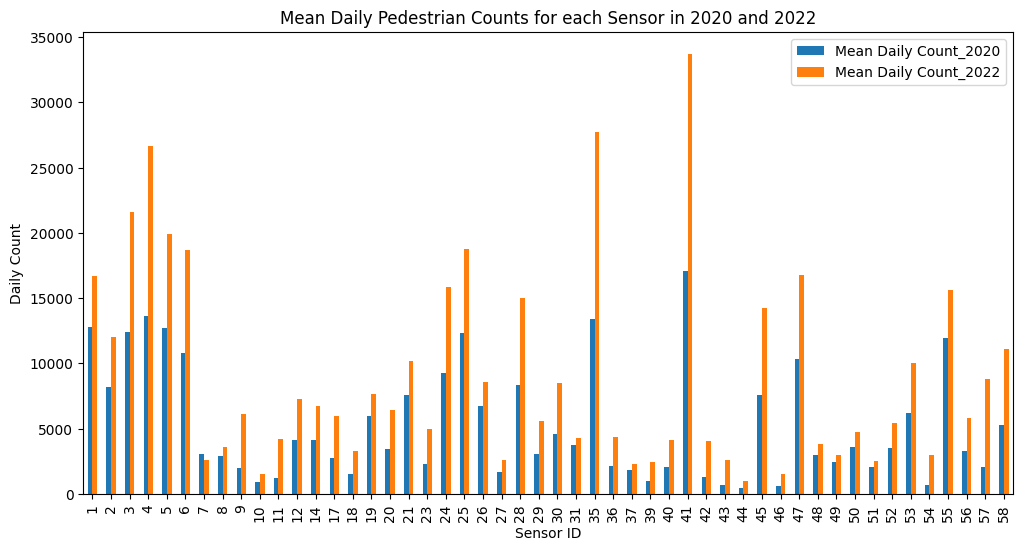

In [30]:
import matplotlib.pyplot as plt

# Group the data by sensor ID and select the daily count columns
sensor_counts = diff_2022_2020_df.groupby('Sensor ID')[['Mean Daily Count_2020', 'Mean Daily Count_2022']].sum()

# Plot a bar chart for each sensor
sensor_counts.plot(kind='bar', figsize=(12,6))

# Add title and labels
plt.title("Mean Daily Pedestrian Counts for each Sensor in 2020 and 2022")
plt.xlabel("Sensor ID")
plt.ylabel("Daily Count")
plt.show()


In [31]:
# Use nlargest function to select the top five rows based on the 'Mean Daily Count Difference (%)' column
top_five_sensors = diff_2022_2020_df.nlargest(5, 'Mean Daily Count Difference (%)')

# Select the 'Sensor ID', 'Sensor Description', and 'Mean Daily Count Difference (%)' columns
top_five_sensors = top_five_sensors[['Sensor ID', 'Sensor Description', 'Mean Daily Count Difference (%)']]

# Set 'Sensor ID' as the index
top_five_sensors.set_index('Sensor ID', inplace=True)

# Print the dataframe
top_five_sensors

,Sensor Description,Mean Daily Count Difference (%)
Sensor ID,,
54,Lincoln-Swanston (West),332.73
57,Bourke St Bridge,324.72
43,Monash Rd-Swanston St (West),258.14
11,Waterfront City,251.94
42,Grattan St-Swanston St (West),218.24


In [32]:
import scipy.stats as stats

# Extract the daily counts for each group
counts_2020 = diff_2022_2020_df['Mean Daily Count_2020'].tolist()
counts_2022 = diff_2022_2020_df['Mean Daily Count_2022'].tolist()

# Perform the t-test assuming unequal variances
t_stat, p_val = stats.ttest_ind(counts_2022, counts_2020, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("p-value:", p_val)

T-statistic: 3.0475559191516006
p-value: 0.0031435655924028365


Based on the t-test with unequal variances conducted on the daily pedestrian traffic counts in Melbourne's CBD between 2020-2022, the null hypothesis that there has been no significant change in the volume of pedestrian traffic over the time frame is rejected. The calculated t-statistic of 3.048 and p-value of 0.0031 suggest that there may have been a short-term increase in pedestrian traffic between 2020-2022. 

In [33]:
# Define a scaling function for the size of the points based on the magnitude of the negative values
def scale_size(x):
    if x < 0:
        return np.abs(x) * 10
    else:
        return x * 10

# Define a function to map the color based on the sign of the value
def color_map(x):
    if x < 0:
        return 'red'
    else:
        return 'blue'

# Create the plot with scaled size and color based on the Daily_Count_Diff_Pct values
filtered_sensors_2022_2018_map = diff_2022_2018_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="CartoLight",
    frame_width=800,
    frame_height=600,
    color=diff_2022_2018_df['Mean Daily Count Difference (%)'].apply(color_map),
    size=diff_2022_2018_df['Mean Daily Count Difference (%)'].apply(scale_size),
    alpha=0.5,
    hover_cols=["Sensor ID", "Sensor Description", "Mean Daily Count Difference (%)"],
    colorbar=True,
).opts(
    title="Pedestrian sensor data comparison between 2018 and 2022",
    show_legend=True
)

print(f"Number of sensors in the list: {len(diff_2022_2018_df)}")
filtered_sensors_2022_2018_map


Number of sensors in the list: 50


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (_color,_size,Sensor ID,Sensor Description,Mean Daily Count Difference (%))

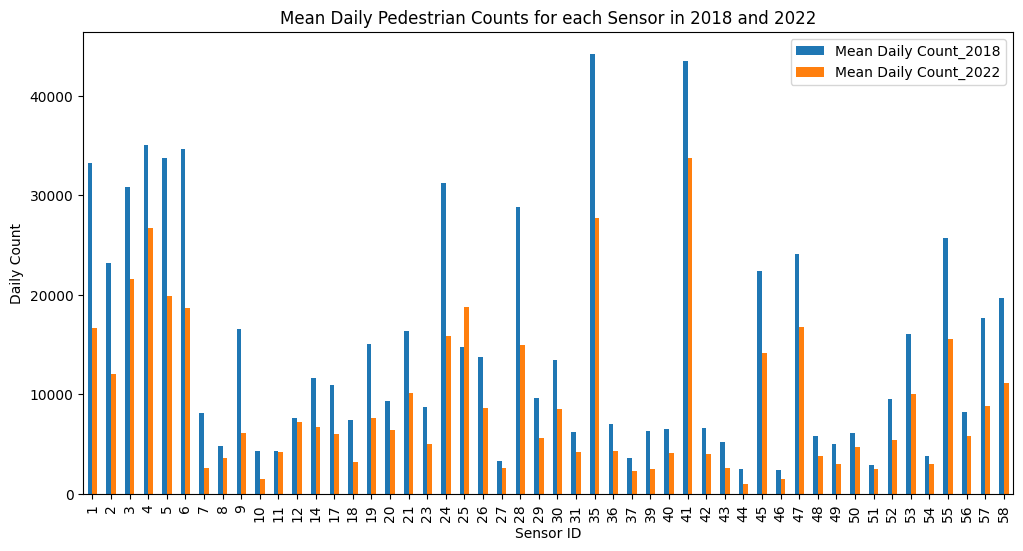

In [34]:
import matplotlib.pyplot as plt

# Group the data by sensor ID and select the daily count columns
sensor_counts = diff_2022_2018_df.groupby('Sensor ID')[['Mean Daily Count_2018', 'Mean Daily Count_2022']].sum()

# Plot a bar chart for each sensor
sensor_counts.plot(kind='bar', figsize=(12,6))

# Add title and labels
plt.title("Mean Daily Pedestrian Counts for each Sensor in 2018 and 2022")
plt.xlabel("Sensor ID")
plt.ylabel("Daily Count")
plt.show()

In [35]:
# Use nsmallest function to select the bottom five rows based on the 'Mean Daily Count Difference (%)' column
bottom_five_sensors = diff_2022_2018_df.nsmallest(5, 'Mean Daily Count Difference (%)')

# Select the 'Sensor ID', 'Sensor Description', and 'Mean Daily Count Difference (%)' columns
bottom_five_sensors = bottom_five_sensors[['Sensor ID', 'Sensor Description', 'Mean Daily Count Difference (%)']]

# Set 'Sensor ID' as the index
bottom_five_sensors.set_index('Sensor ID', inplace=True)

# Print the dataframe
bottom_five_sensors


,Sensor Description,Mean Daily Count Difference (%)
Sensor ID,,
7,Birrarung Marr,-67.88
10,Victoria Point,-64.92
9,Southern Cross Station,-62.96
39,Alfred Place,-60.63
44,Tin Alley-Swanston St (West),-59.72


In [36]:
import scipy.stats as stats

# Select the daily pedestrian counts for each sensor in 2018 and 2022
counts_2018 = diff_2022_2018_df['Mean Daily Count_2018']
counts_2022 = diff_2022_2018_df['Mean Daily Count_2022']

# Perform the paired t-test
t_stat, p_val = stats.ttest_rel(counts_2022, counts_2018)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -8.094467247847524
p-value: 1.3705484071642827e-10


The calculated t-statistic is -8.094, which indicates that the mean difference between the paired samples is statistically significant. The calculated p-value is 1.371 x 10^-10, which is much less than the conventional significance level of 0.05. This indicates strong evidence against the null hypothesis that there is no significant difference in the mean daily pedestrian counts between 2018 and 2022. Therefore it can be concluded that there has been a significant decrease in the volume of pedestrian traffic in Melbourne's CBD between 2018 and 2022.

Based on the two statistical analyses performed, there is evidence to suggest that the volume of pedestrian traffic in Melbourne's CBD has decreased between 2018-2022. The paired t-test on the daily pedestrian counts for each sensor in 2018 and 2022 found a statistically significant decrease in pedestrian traffic over that time frame. Additionally, the t-test with unequal variances on the daily pedestrian traffic counts between 2020-2022 found evidence for a short-term increase in pedestrian traffic, although the overall trend for the entire time frame is unclear.

In summary, there has been a significant decrease in pedestrian traffic in Melbourne's CBD over the past few years, with some indications of a short-term increase more recently.